In [31]:
import pandas as pd
import requests
import geopandas as gpd
import tempun
import matplotlib.pyplot as plt

### downloading dataset

In [2]:
r = requests.get("http://repository.edition-topoi.org/collection/ICG/export/ICG_objects.cite?dl=1")

In [3]:
icg_json = r.json()

In [4]:
icg_df = pd.DataFrame(icg_json).T
icg_df.head(10)

,_id,_rev,id,type,update_date,scis,search_text,descr_medium,kind_filter_key,creation_date,...,dating_str,orig_text,region_id,dating_filter_key,doi,ancientcity,placeofdiscovery,placeofkeeping,region,resources
1,inscription-1,2-b20a3f34a875ffb0ecfc5fc4667e3478,1,inscription,2016-11-30 12:02:15,"{'images': {'title': 'figure set 0001', 'file'...",Κυριε βοηθοη το + δουλο σου τον εγοδομοτα κε κ...,,invocation,2015-06-08 10:45:41,...,800 - 1100,Κ(ύριε) βοήθ<ο>-\r\n η το + δ̣ο...,20,"[800, 1100]",10.17171/1-8-1,"{'id': 3, 'latitude': 38.301504, 'region_categ...","{'id': 2, 'latitude': 38.2646, 'region_categor...","{'id': 1, 'latitude': 38.2646, 'region_categor...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0001': {'id': '0001', 'metadata':..."
4,inscription-4,2-606785332ab986cd81ca33a54fa79f8e,4,inscription,2016-03-22 01:57:26,"{'images': {'title': 'figure set 0004', 'file'...",Νικομα Δορυμηνης Αλεξανδρου + ΑΥΛΙΜΑΡΙΟΥ,Giebel mit Kranz,epitaph_,2015-06-08 10:45:41,...,300 - 700,Νικό̳μ̳α̳\r\n Δορυμήνης Ἀ̣λ̣εξ-\r\n ...,20,"[300, 700]",10.17171/1-8-2958,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0004': {'id': '0004', 'metadata':..."
5,inscription-5,2-6ce452e1cd8587d82456ff28808e4a68,5,inscription,2017-09-07 13:30:15,"{'images': {'title': 'figure set 0005', 'file'...",☩ ενθαδε κατακιται τις ος επικαλιειται Πυργος ...,"Giebel mit ausgeschlagenem Kreuz: Höhe 0,54, B...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε κατά[κ]ιταί\r\n [τις ὃ...,20,"[300, 700]",10.17171/1-8-3064,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0005': {'id': '0005', 'metadata':..."
6,inscription-6,2-ec4dad4a7b0e54900b0891be3464b68f,6,inscription,2016-03-22 01:57:50,{},☩ ενθαδε κατακιτε Σοπρονια τιγατηρ Παπιου Καρπου.,"Runde Säule (Durchm. 0,38) mit recheckiger Spi...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\n κατάκιτε\r\n Σοπ[ρ]ο...,20,"[300, 700]",10.17171/1-8-3170,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
7,inscription-7,2-7712e88e62944d8a7c22ec9233ddd99d,7,inscription,2016-03-22 01:58:04,{},☩ ενθαδε κατακιτε Δομνος.,"Höhe 0,94, Breite 0,76; Inschriftenfeld",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\nκατάκιτε\r\nΔόμνος.\r\n,20,"[300, 700]",10.17171/1-8-3278,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
8,inscription-8,2-59eae04b5a4676418cba93f5efd91e60,8,inscription,2016-03-22 01:58:20,{},☩ ενθαδε κατακιτε Βασιλισυσα τιγατυρ Νικανδρου.,"Höhe 0,34, Breite 0,29",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε\r\n κατάκιτε\r\n Βασίλισ...,20,"[300, 700]",10.17171/1-8-3381,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[]
9,inscription-9,2-c7bd736944ce2aedb9ee89ecaf022d1b,9,inscription,2016-03-22 01:58:33,"{'images': {'title': 'figure set 0009', 'file'...",☩ ενθαδε κατακιτε Δομετις υιος — — — ου δομεστ...,"Dreieckiger Giebel: Höhe 0,46, Breite 0,90; im...",epitaph,2015-06-08 10:45:41,...,300 - 700,☩ ἐνθάδε κατάκιτε Δομ-\r\nέτις υἱὸς [— — —]\r\...,20,"[300, 700]",10.17171/1-8-3492,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0009': {'id': '0009', 'metadata':..."
10,inscription-10,2-21b65b04a5807e3f066e08a4943a3407,10,inscription,2016-11-30 

### extracting geographies

In [10]:
icg_df["longitude"] = icg_df["ancientcity"].apply(lambda x: x["longitude"])
icg_df["latitude"] = icg_df["ancientcity"].apply(lambda x: x["latitude"])
icg_df["ancientcity_name"] = icg_df["ancientcity"].apply(lambda x: x["name"])

In [13]:
geom = gpd.points_from_xy(icg_df["longitude"], icg_df["latitude"], crs="EPSG:4326")
icg_df = gpd.GeoDataFrame(icg_df, geometry=geom)

<Axes: >

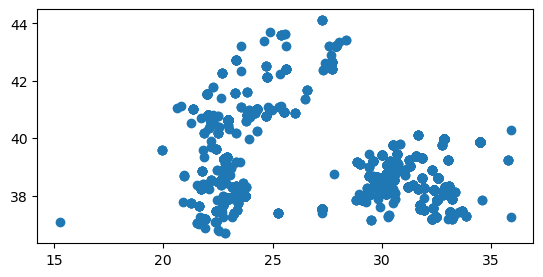

In [14]:
icg_df.plot()

In [15]:
icg_df.head(5)

,_id,_rev,id,type,update_date,scis,search_text,descr_medium,kind_filter_key,creation_date,...,doi,ancientcity,placeofdiscovery,placeofkeeping,region,resources,longitude,latitude,ancientcity_name,geometry
1,inscription-1,2-b20a3f34a875ffb0ecfc5fc4667e3478,1,inscription,2016-11-30 12:02:15,"{'images': {'title': 'figure set 0001', 'file'...",Κυριε βοηθοη το + δουλο σου τον εγοδομοτα κε κ...,,invocation,2015-06-08 10:45:41,...,10.17171/1-8-1,"{'id': 3, 'latitude': 38.301504, 'region_categ...","{'id': 2, 'latitude': 38.2646, 'region_categor...","{'id': 1, 'latitude': 38.2646, 'region_categor...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0001': {'id': '0001', 'metadata':...",32.876326,38.301504,Congussus,POINT (32.87633 38.30150)
4,inscription-4,2-606785332ab986cd81ca33a54fa79f8e,4,inscription,2016-03-22 01:57:26,"{'images': {'title': 'figure set 0004', 'file'...",Νικομα Δορυμηνης Αλεξανδρου + ΑΥΛΙΜΑΡΙΟΥ,Giebel mit Kranz,epitaph_,2015-06-08 10:45:41,...,10.17171/1-8-2958,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0004': {'id': '0004', 'metadata':...",33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
5,inscription-5,2-6ce452e1cd8587d82456ff28808e4a68,5,inscription,2017-09-07 13:30:15,"{'images': {'title': 'figure set 0005', 'file'...",☩ ενθαδε κατακιται τις ος επικαλιειται Πυργος ...,"Giebel mit ausgeschlagenem Kreuz: Höhe 0,54, B...",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3064,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}","{'images': {'0005': {'id': '0005', 'metadata':...",33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
6,inscription-6,2-ec4dad4a7b0e54900b0891be3464b68f,6,inscription,2016-03-22 01:57:50,{},☩ ενθαδε κατακιτε Σοπρονια τιγατηρ Παπιου Καρπου.,"Runde Säule (Durchm. 0,38) mit recheckiger Spi...",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3170,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[],33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)
7,inscription-7,2-7712e88e62944d8a7c22ec9233ddd99d,7,inscription,2016-03-22 01:58:04,{},☩ ενθαδε κατακιτε Δομνος.,"Höhe 0,94, Breite 0,76; Inschriftenfeld",epitaph,2015-06-08 10:45:41,...,10.17171/1-8-3278,"{'id': 5, 'latitude': 38.339036, 'region_categ...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 3, 'latitude': 38.34636, 'region_catego...","{'id': 20, 'name': 'Lycaonia'}",[],33.075334,38.339036,Anzulada,POINT (33.07533 38.33904)


In [37]:
icg_df = icg_df[["id", "doi", "thumb_baseurl", "search_text", "orig_text", "transl_text", "type", "kind", "dating_centuries", "dating_str", "ancient_city_id", "ancientcity_name", "geometry"]]

### cleaning dates

In [38]:
dating_str = "500 - 1500"
dating_str.partition(" - ")

('500', ' - ', '1500')

In [39]:
def get_dates(dating_str):
    date_list = dating_str.partition(" - ")
    try:
        not_before = int(date_list[0])
        not_after = int(date_list[2])
    except:
        not_before = None
        not_after = None
    return not_before, not_after
dates = icg_df["dating_str"].apply(get_dates)
icg_df["not_before"] = [d[0] for d in dates]
icg_df["not_after"] = [d[1] for d in dates]

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [40]:
icg_df["random_dates"] = icg_df.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100), axis=1)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(0.0, 800.0)

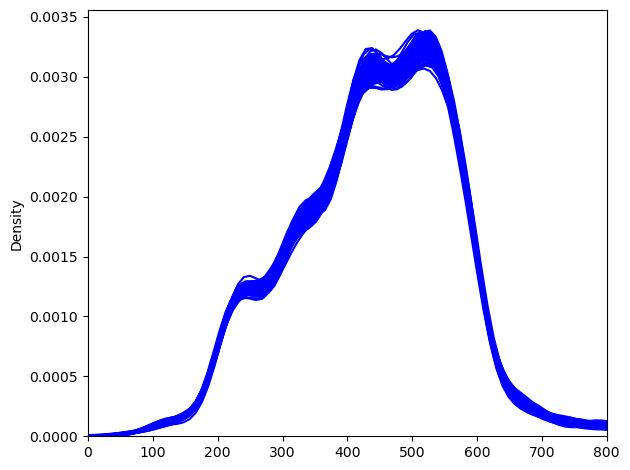

In [41]:
fig, ax = plt.subplots(tight_layout=True)
tempun.kdeplot_from_randoms(icg_df["random_dates"], ax=ax,color="blue", random_size=100)
ax.set_xlim(0,800)

[[<matplotlib.patches.Polygon at 0x286f2d340>],

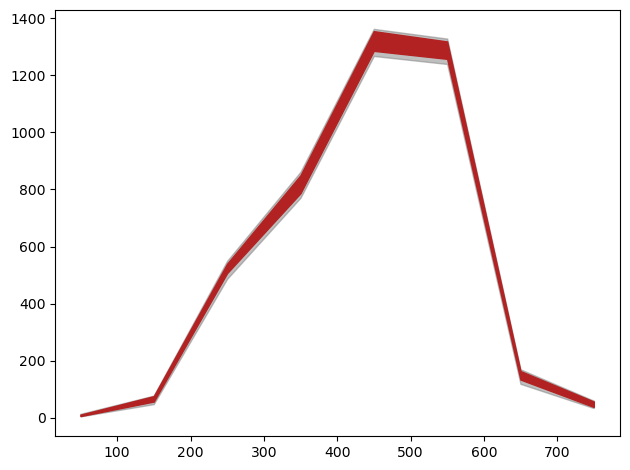

In [42]:
fig, ax = plt.subplots(tight_layout=True)
random_size=100
tempun.timeblocksplot_from_randoms(icg_df["random_dates"], ax=ax, color="firebrick", timeblocks=[0,800,100], random_size=random_size)

In [43]:
icg_df.to_parquet("../data/icg_df.parquet")